<a href="https://colab.research.google.com/github/lucaskydelima/Cluster-Analysis-in-Python/blob/main/Fuzzy_C_means_clustering_exercise_p6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
N = 900
D = 2
s = 4
mu = np.array([
    [0,0],
    [0,s],
    [s,s]
])

X = np.zeros((N,D))

X[:300,] = np.random.randn(300, D) + mu[0]
X[300:600,] = np.random.randn(300, D) + mu[1]
X[600:900,] = np.random.randn(300, D) + mu[2]

X

array([[-0.24500855,  0.14486053],
       [ 0.79489286,  0.06706577],
       [-0.08334766, -0.20068034],
       ...,
       [ 4.08960327,  3.83984189],
       [ 2.89242375,  5.23172852],
       [ 4.65784587,  6.41797555]])

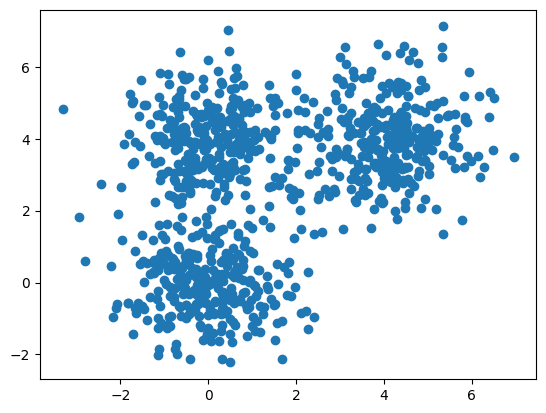

In [100]:
plt.scatter(x=X[:,0], y=X[:,1])

In [101]:
np.random.permutation(X)[:3]

array([[4.37529532, 6.38949846],
       [4.76749159, 4.00420628],
       [5.88758362, 4.4706206 ]])

In [102]:
def cost(X, R, M):
  cost = 0
  for k in range(len(M)):
    for n in range(len(X)):
      cost += R[n,k]*d(M[k],X[n])
  return cost

def d(u,v):
  diff = u-v
  return diff.dot(diff)

def plot_k_means(X, K, max_iter=20, beta=1.0):
  N, D = X.shape
  M = np.zeros((K,D))
  R = np.zeros(((N,K)))
  costs = np.zeros(max_iter)

  # initialize M to random
  for k in range(K):
    M[k] = X[np.random.choice(N)]

  nrows = 5
  ncols = int(max_iter / nrows)
  random_colors = np.random.random((K,3))
  fig, ax = plt.subplots(figsize=(15,15))

  for i in range(max_iter):
    colors = R.dot(random_colors)
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(x=X[:,0], y=X[:,1], c=colors)

    # step 1: determine assignments / responsibilities 
    for k in range(K):
      for n in range(N):
        R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))

    costs[i] = cost(X, R, M)

    # step 2: recalculate means 
    for k in range(K):
      M[k] = R[:,k].dot(X) / R[:,k].sum()

    if i > 0:
      if np.abs(costs[i] - costs[i-1]) < 0.1:
        print(f"Converged on step {i}")
        break

<ipython-input-102-9b166c77ed2d>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, i+1)
<ipython-input-102-9b166c77ed2d>:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))


Converged on step 6


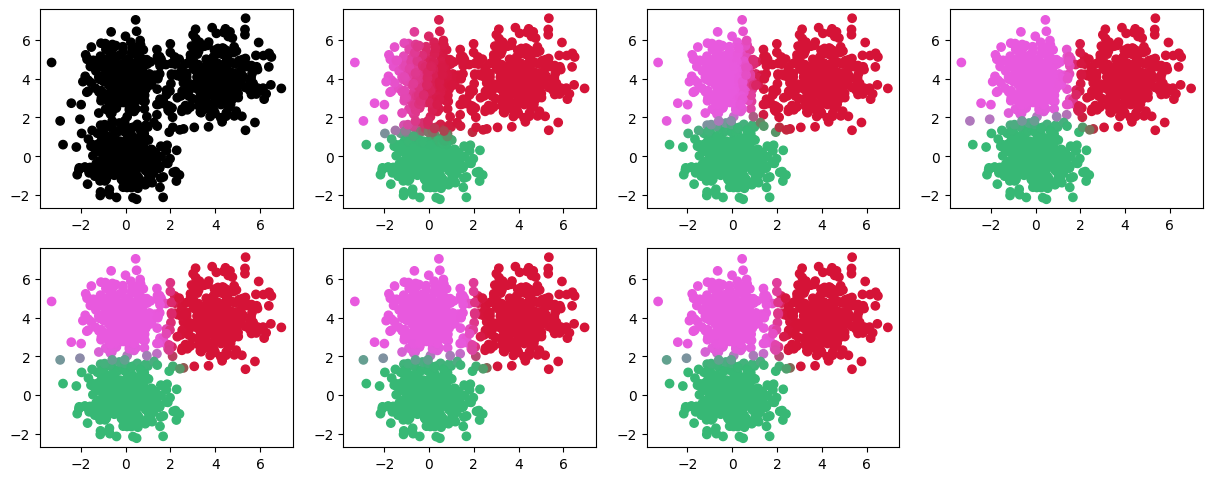

In [103]:
K = 3
plot_k_means(X, K)

<ipython-input-102-9b166c77ed2d>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, i+1)
<ipython-input-102-9b166c77ed2d>:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))


Converged on step 20


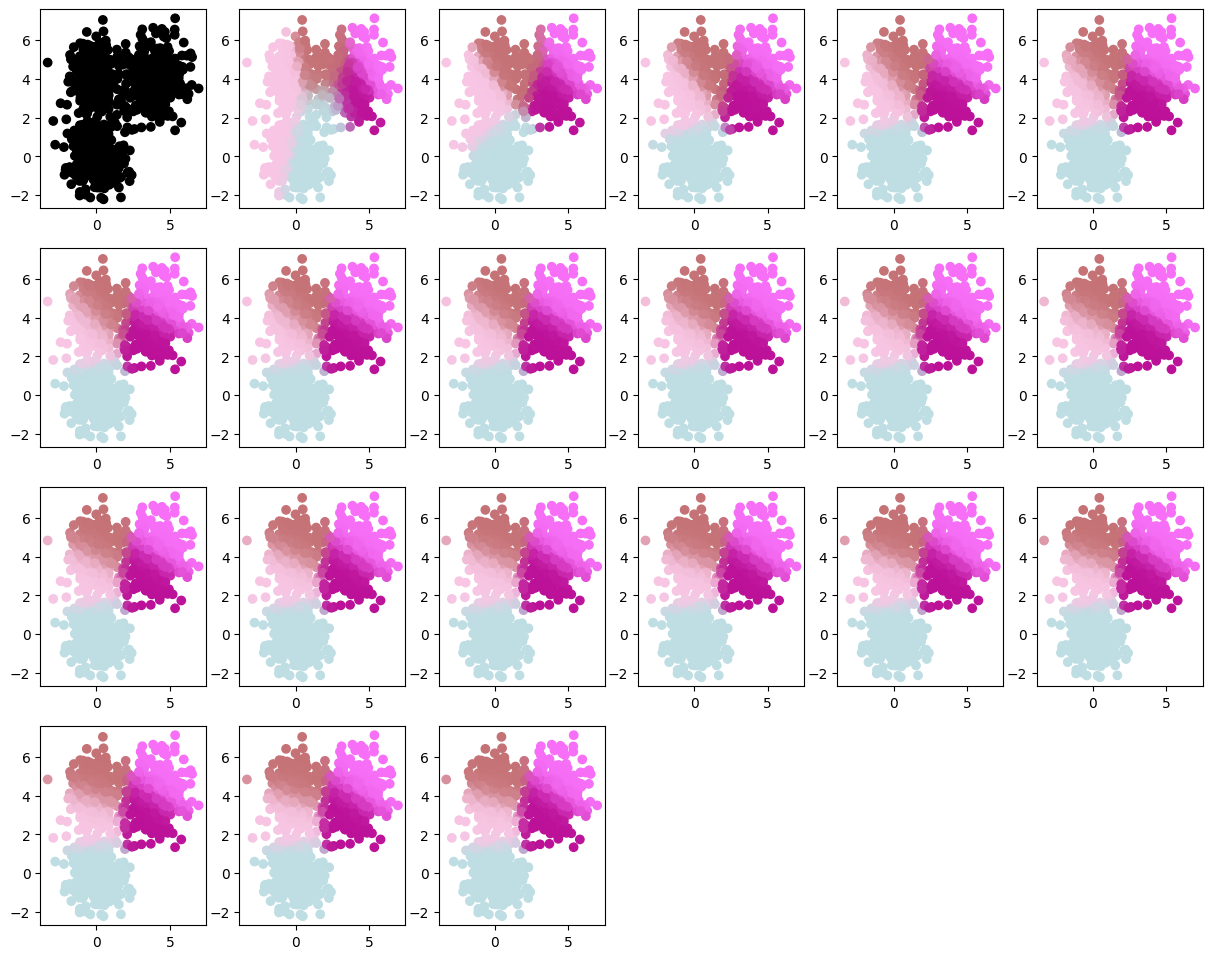

In [104]:
K = 5
plot_k_means(X, K, max_iter=30)

<ipython-input-102-9b166c77ed2d>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, i+1)
<ipython-input-102-9b166c77ed2d>:35: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  R[n,k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))


Converged on step 27


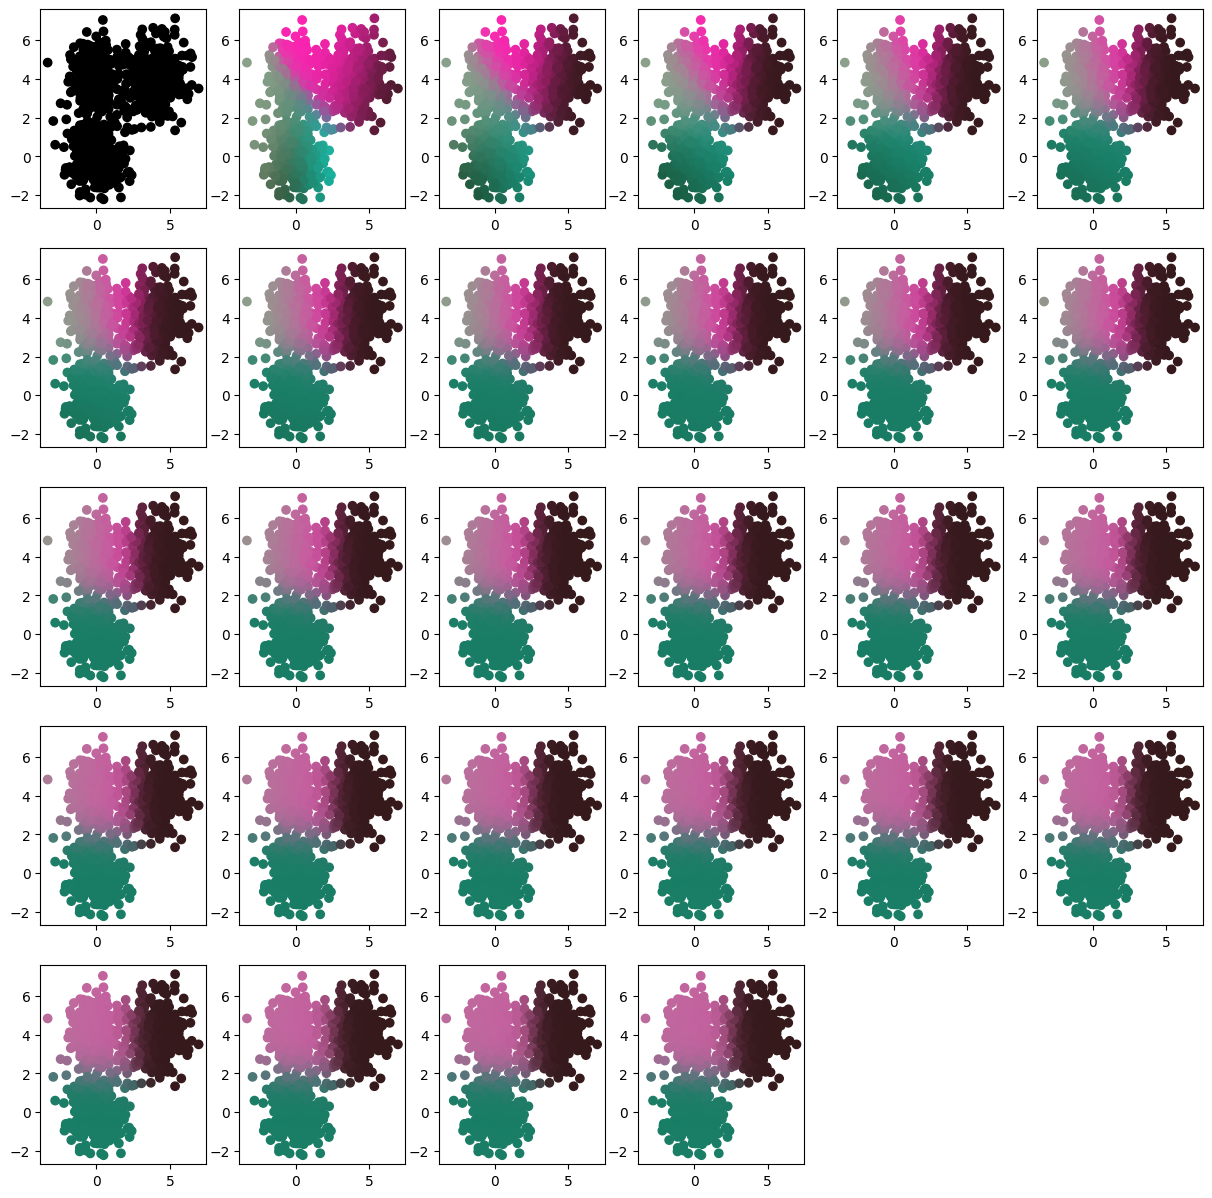

In [105]:
K = 5
plot_k_means(X, K, max_iter=30, beta=0.3)